In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [7]:
class CustomNeuralNetwork:
    def __init__(self):
        input_neurons = 2
        hidden_neurons_layer1 = 32
        hidden_neurons_layer2 = 16
        hidden_neurons_layer3 = 8
        output_neurons = 3

        self.learning_rate = 0.01
        self.weights_input_to_hidden1 = np.random.randn(input_neurons, hidden_neurons_layer1)
        self.weights_hidden1_to_hidden2 = np.random.randn(hidden_neurons_layer1, hidden_neurons_layer2)
        self.weights_hidden2_to_hidden3 = np.random.randn(hidden_neurons_layer2, hidden_neurons_layer3)
        self.weights_hidden3_to_output = np.random.randn(hidden_neurons_layer3, output_neurons)

    def activation_relu(self, input_data, derivative=False):
        if derivative:
            return (input_data > 0).astype(float)
        return np.maximum(0, input_data)

    def activation_softmax(self, logits):
        exp_values = np.exp(logits - np.max(logits, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def forward_pass(self, inputs):
        hidden_layer_input1 = np.dot(inputs, self.weights_input_to_hidden1)
        self.hidden_layer_output1 = self.activation_relu(hidden_layer_input1)

        hidden_layer_input2 = np.dot(self.hidden_layer_output1, self.weights_hidden1_to_hidden2)
        self.hidden_layer_output2 = self.activation_relu(hidden_layer_input2)

        hidden_layer_input3 = np.dot(self.hidden_layer_output2, self.weights_hidden2_to_hidden3)
        self.hidden_layer_output3 = self.activation_relu(hidden_layer_input3)

        output_layer_input = np.dot(self.hidden_layer_output3, self.weights_hidden3_to_output)
        predictions = self.activation_softmax(output_layer_input)
        return predictions

    def backward_pass(self, inputs, true_labels, predicted_labels):
        error_output_layer = true_labels - predicted_labels
        gradient_output_layer = self.learning_rate * error_output_layer

        error_hidden3 = gradient_output_layer.dot(self.weights_hidden3_to_output.T) * self.activation_relu(self.hidden_layer_output3, derivative=True)
        gradient_hidden3 = self.learning_rate * error_hidden3

        error_hidden2 = gradient_hidden3.dot(self.weights_hidden2_to_hidden3.T) * self.activation_relu(self.hidden_layer_output2, derivative=True)
        gradient_hidden2 = self.learning_rate * error_hidden2

        error_hidden1 = gradient_hidden2.dot(self.weights_hidden1_to_hidden2.T) * self.activation_relu(self.hidden_layer_output1, derivative=True)
        gradient_hidden1 = self.learning_rate * error_hidden1

        self.weights_input_to_hidden1 += inputs.T.dot(gradient_hidden1)
        self.weights_hidden1_to_hidden2 += self.hidden_layer_output1.T.dot(gradient_hidden2)
        self.weights_hidden2_to_hidden3 += self.hidden_layer_output2.T.dot(gradient_hidden3)
        self.weights_hidden3_to_output += self.hidden_layer_output3.T.dot(gradient_output_layer)

    def train_model(self, inputs, true_labels):
        predictions = self.forward_pass(inputs)
        self.backward_pass(inputs, true_labels, predictions)

In [8]:
np.random.seed(42)
features, labels = make_blobs(n_samples=80, centers=3, n_features=2, random_state=42)
labels = labels.astype(int)

In [9]:
labels_one_hot = np.zeros((labels.size, labels.max() + 1))
labels_one_hot[np.arange(labels.size), labels] = 1

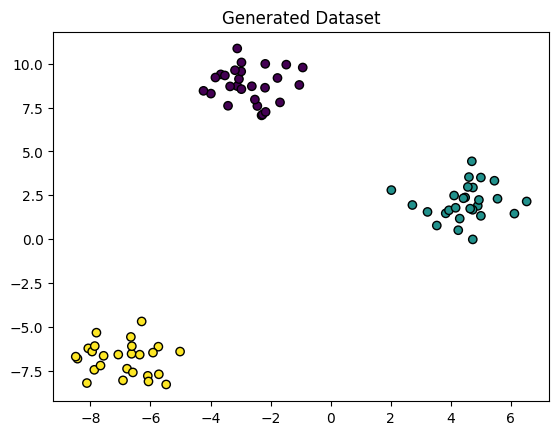

In [10]:
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap="viridis", edgecolor="k")
plt.title("Generated Dataset")
plt.show()


In [13]:
network = CustomNeuralNetwork()
loss_values = []
for iteration in range(100):
    predictions = network.forward_pass(features)
    loss = np.mean(np.square(labels_one_hot - predictions))
    loss_values.append(loss)
    network.train_model(features, labels_one_hot)

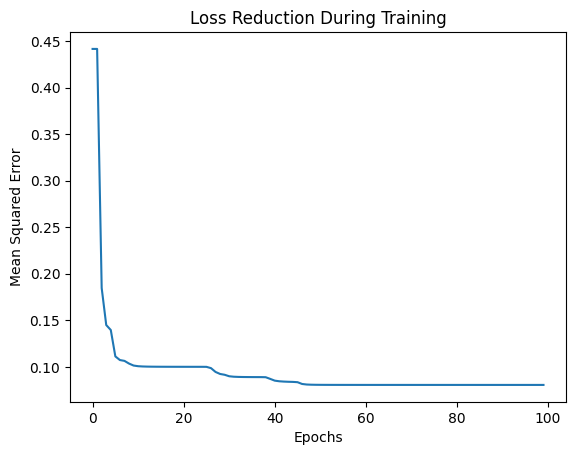

In [14]:
plt.plot(loss_values)
plt.title("Loss Reduction During Training")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.show()

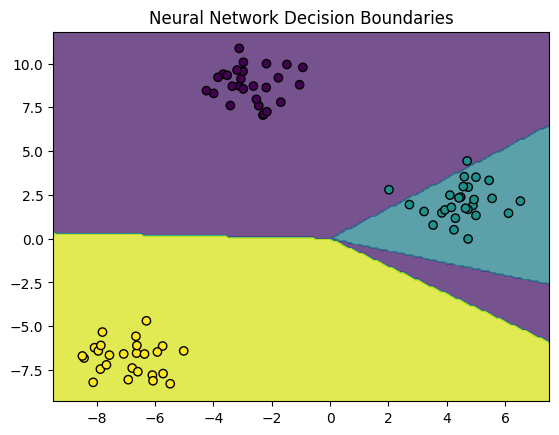

In [15]:
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
grid_predictions = network.forward_pass(np.c_[xx.ravel(), yy.ravel()])
grid_predictions = np.argmax(grid_predictions, axis=1)
grid_predictions = grid_predictions.reshape(xx.shape)

plt.contourf(xx, yy, grid_predictions, alpha=0.75, cmap="viridis")
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap="viridis", edgecolor="k")
plt.title("Neural Network Decision Boundaries")
plt.show()